#Starbucks Customer Behavior and Satisfaction Analysis

###Understand the Business Problem
Starbucks brances in Malaysia have conducted customer surveys with various types of information. They collect data from customers but don't know how the data should be used efficiently.

***My goal for this project** is to analyze the habits of customers and their satisfaction, so that the company can to create highly personalised marketing campaigns.


##Data Preparation
- import packages
- load dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
#read data
df = pd.read_csv('/content/drive/MyDrive/Dibimbing DS31/Assignment/Project DA/Starbucks satisfactory survey.csv')
print(df.shape)
df.head()

(122, 21)


,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                               122 non-null    object
 1   1. Your Gender                                                                                                          122 non-null    object
 2   2. Your Age                                                                                                             122 non-null    object
 3   3. Are you currently....?                                                                                               122 non-null    object
 4   4.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
"12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",122.0,3.663934,0.941343,1.0,3.0,4.0,4.0,5.0
13. How would you rate the price range at Starbucks?,122.0,2.893443,1.081836,1.0,2.0,3.0,4.0,5.0
14. How important are sales and promotions in your purchase decision?,122.0,3.795082,1.090443,1.0,3.0,4.0,5.0,5.0
"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",122.0,3.754098,0.929867,1.0,3.0,4.0,4.0,5.0
16. You rate the WiFi quality at Starbucks as..,122.0,3.254098,0.958317,1.0,3.0,3.0,4.0,5.0
"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",122.0,3.745902,0.828834,1.0,3.0,4.0,4.0,5.0
18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,122.0,3.516393,1.030394,1.0,3.0,4.0,4.0,5.0


##Data Cleaning
- understand variables
- rename column
- clean dataset (missing value, duplicates data, outliers)

In [ ]:
#remove column and add id column
df.drop("10. What do you most frequently purchase at Starbucks?", inplace=True, axis=1)
df.drop("19. How do you come to hear of promotions at Starbucks? Check all that apply.", inplace= True, axis=1)
df.drop("Timestamp", inplace= True, axis=1)
df.insert(0, 'ID', range(1, 1 + len(df)))
df.head()

,ID,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,20. Will you continue buying at Starbucks?
0,1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Less than RM20,4,3,5,5,4,4,3,Yes
1,2,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Less than RM20,4,3,4,4,4,5,2,Yes
2,3,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Less than RM20,4,3,4,4,4,4,3,Yes
3,4,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Less than RM20,2,1,4,3,3,3,3,No
4,5,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Around RM20 - RM40,3,3,4,2,2,3,3,Yes


In [ ]:
#rename columm
new_column_names = ["ID", "Gender", "Age", "Occupation", "Income", "Visit Frequency", "Visit Type", "Visit Duration", "Nearest Outlet",
                    "Membership", "Spending per Visit", "Quality Rating", "Price Rating", "Promo Importance", "Ambience Rating",
                    "Wifi Rating", "Service Rating", "Meeting Likelihood", "Will Continue Buying"]
df.columns = new_column_names
df.head()

,ID,Gender,Age,Occupation,Income,Visit Frequency,Visit Type,Visit Duration,Nearest Outlet,Membership,Spending per Visit,Quality Rating,Price Rating,Promo Importance,Ambience Rating,Wifi Rating,Service Rating,Meeting Likelihood,Will Continue Buying
0,1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Less than RM20,4,3,5,5,4,4,3,Yes
1,2,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Less than RM20,4,3,4,4,4,5,2,Yes
2,3,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Less than RM20,4,3,4,4,4,4,3,Yes
3,4,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Less than RM20,2,1,4,3,3,3,3,No
4,5,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Around RM20 - RM40,3,3,4,2,2,3,3,Yes


In [ ]:
#handling duplicate
data = df.copy()
len(data.drop_duplicates()) / len(data) #if 1 no duplicates

1.0

In [ ]:
#handling missing value
df.isna().sum()

,0
ID,0
Gender,0
Age,0
Occupation,0
Income,0
Visit Frequency,0
Visit Type,1
Visit Duration,0
Nearest Outlet,0
Membership,0


In [ ]:
#remove null rows in column
df = df.dropna(subset=['Visit Type'])
df.isna().sum()

,0
ID,0
Gender,0
Age,0
Occupation,0
Income,0
Visit Frequency,0
Visit Type,0
Visit Duration,0
Nearest Outlet,0
Membership,0


In [ ]:
#identify categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")
    print("\n")

Unique values in Gender: ['Female' 'Male']


Unique values in Age: ['From 20 to 29' 'From 30 to 39' '40 and above' 'Below 20']


Unique values in Occupation: ['Student' 'Employed' 'Self-employed' 'Housewife']


Unique values in Income: ['Less than RM25,000' 'RM50,000 - RM100,000' 'RM25,000 - RM50,000'
 'RM100,000 - RM150,000' 'More than RM150,000']


Unique values in Visit Frequency: ['Rarely' 'Monthly' 'Weekly' 'Never' 'Daily']


Unique values in Visit Type: ['Dine in' 'Take away' 'Drive-thru' 'never' 'Never buy'
 'I dont like coffee' 'Never' 'Never ']


Unique values in Visit Duration: ['Between 30 minutes to 1 hour' 'Below 30 minutes' 'More than 3 hours'
 'Between 1 hour to 2 hours' 'Between 2 hours to 3 hours']


Unique values in Nearest Outlet: ['within 1km' '1km - 3km' 'more than 3km']


Unique values in Membership: ['Yes' 'No']


Unique values in Spending per Visit: ['Less than RM20' 'Around RM20 - RM40' 'More than RM40' 'Zero']


Unique values in Will Continue Buying: ['Yes' 'N

in column Visit Type there are some inconsistent input values like: 'never' 'Never buy' 'I dont like coffee' 'Never' 'Never '

In [ ]:
#replace inconsistent data
a = ['never', 'Never buy', 'I dont like coffee','Never ']
df['Visit Type'].replace(a,'Never',inplace=True)
df['Visit Type'].unique()

array(['Dine in', 'Take away', 'Drive-thru', 'Never'], dtype=object)

##Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 121
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    121 non-null    int64 
 1   Gender                121 non-null    object
 2   Age                   121 non-null    object
 3   Occupation            121 non-null    object
 4   Income                121 non-null    object
 5   Visit Frequency       121 non-null    object
 6   Visit Type            121 non-null    object
 7   Visit Duration        121 non-null    object
 8   Nearest Outlet        121 non-null    object
 9   Membership            121 non-null    object
 10  Spending per Visit    121 non-null    object
 11  Quality Rating        121 non-null    int64 
 12  Price Rating          121 non-null    int64 
 13  Promo Importance      121 non-null    int64 
 14  Ambience Rating       121 non-null    int64 
 15  Wifi Rating           121 non-null    int64 


In [ ]:
#split categorical columns
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    print(f"\nFrequency for column {col}:")
    print(df[col].value_counts())


Frequency for column Gender:
Gender
Female    65
Male      56
Name: count, dtype: int64

Frequency for column Age:
Age
From 20 to 29    84
From 30 to 39    17
Below 20         13
40 and above      7
Name: count, dtype: int64

Frequency for column Occupation:
Occupation
Employed         60
Student          42
Self-employed    17
Housewife         2
Name: count, dtype: int64

Frequency for column Income:
Income
Less than RM25,000       70
RM25,000 - RM50,000      25
RM50,000 - RM100,000     17
More than RM150,000       6
RM100,000 - RM150,000     3
Name: count, dtype: int64

Frequency for column Visit Frequency:
Visit Frequency
Rarely     76
Monthly    26
Weekly      9
Never       8
Daily       2
Name: count, dtype: int64

Frequency for column Visit Type:
Visit Type
Take away     49
Dine in       46
Drive-thru    20
Never          6
Name: count, dtype: int64

Frequency for column Visit Duration:
Visit Duration
Below 30 minutes                72
Between 30 minutes to 1 hour    34
Between

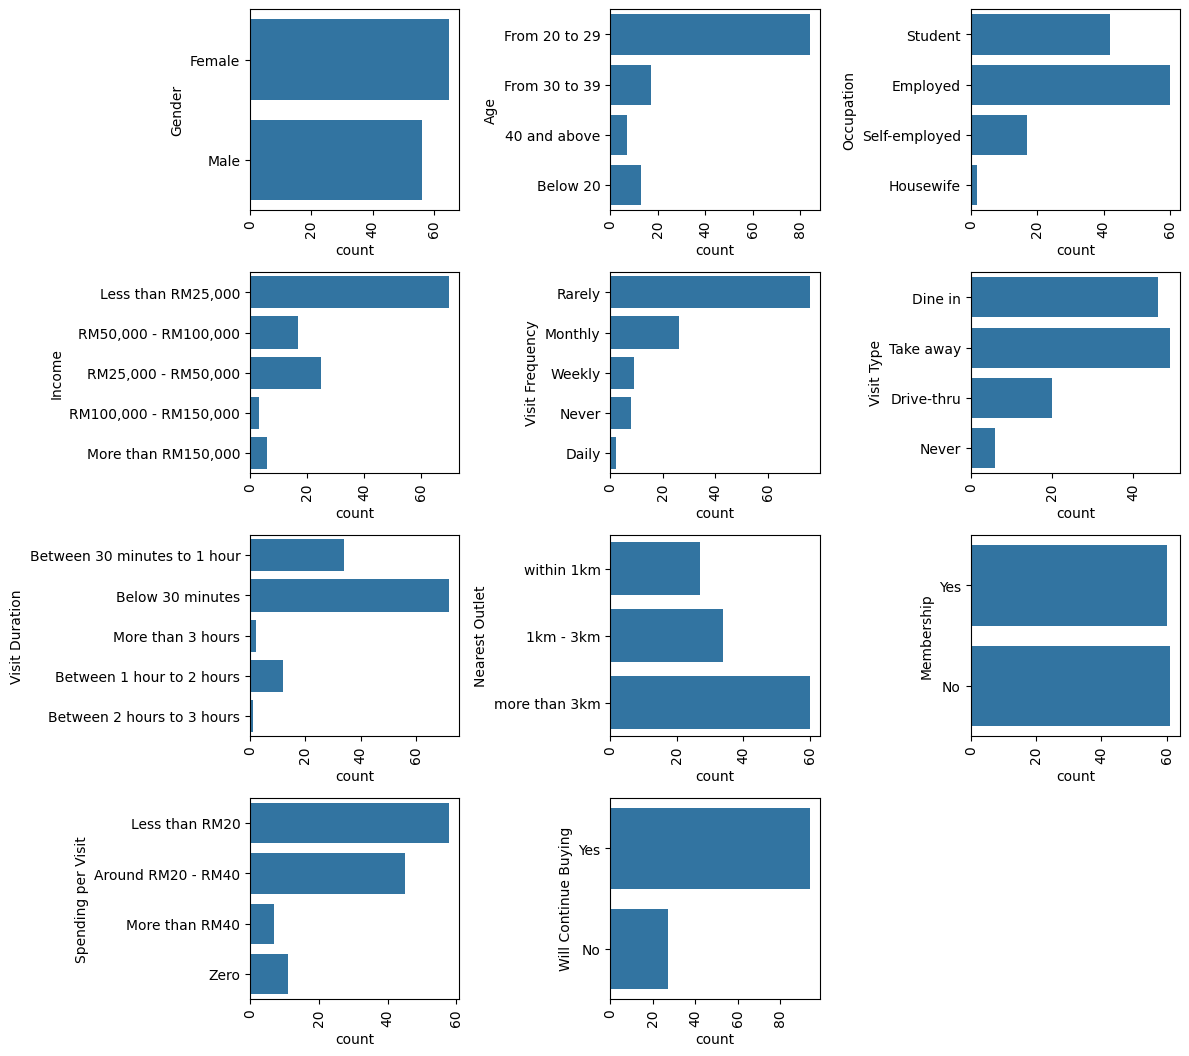

In [ ]:
import math

num_cols = len(categorical_cols)
num_rows = math.ceil(num_cols / 3)  # Calculate the number of rows needed

#make count plot for categorical columns
plt.figure(figsize=(12, 8 * num_rows / 3))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.countplot(df[col])
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

###Insight for this count plot:
1. Gender
  - Respondents are evently split between Female and Male, but Female is slightly more prevalent.
  - This shows that Starbucks is attractive to both gender.
2. Age
  - Most of them are between 20 - 29 years old.
  - This suggest that Starbucks is popular with younger people, such as college student.
3. Occupation
  - The most common jobs are employed and student.
  - Suitable for 20-29s working or studying.
4. Income
  - Majority earn 'less than RM25,000' per year.
  - Most likely student or entry-level salaried workers.
5. Visit Frequency
  - Most of the responden answered that they visit Starbucks 'Rarely'.
  - This shows that Starbucks is more of an occasional place, not a regular habit.
6. Visit Type
  - 'Take Away' and 'Dine In' are the top two.
  - That customers enjoy their Starbucks food and beverages.
7. Visit Duration
  - Most dominant is 'Below 30 minutes'.
  - Very few stayed longer than 2-3 hours.
8. Nearest Outlet
  - Most respondents said 'more than 3km' from their location.
  - Indicates quite a distance for majority, which could be the reason for the low frequency of visits.
9. Membership Card
  - There was an almost even split between 'Yes' and 'No'.
  - This means that there is still potential to increase the number of members.
10. SPending per Visit
  - The majority spend 'Less than RM20' or 'Around RM20 - RM40' per visit.
  - This maybe because the majority are low-moderate income earners and prefer to buy drinks only.
11. Will Continue Buying
  - Most answered 'Yes'.
  - This indicates a relatively high level of loyalty, even though the frequency of visits is not very frequent.

In [ ]:
#split rating columns
rating_cols = ["Quality Rating", "Price Rating", "Promo Importance", "Ambience Rating", "Wifi Rating", "Service Rating", "Meeting Likelihood"]
print("\nDescriptive Statistics:")
df[rating_cols].describe().T


Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Quality Rating,121.0,3.685950,0.913173,1.0,3.0,4.0,4.0,5.0
Price Rating,121.0,2.909091,1.072381,1.0,2.0,3.0,4.0,5.0
Promo Importance,121.0,3.818182,1.064581,1.0,3.0,4.0,5.0,5.0
Ambience Rating,121.0,3.760331,0.931171,1.0,3.0,4.0,4.0,5.0
Wifi Rating,121.0,3.256198,0.962020,1.0,3.0,3.0,4.0,5.0
Service Rating,121.0,3.752066,0.829468,1.0,3.0,4.0,4.0,5.0
Meeting Likelihood,121.0,3.520661,1.033595,1.0,3.0,4.0,4.0,5.0


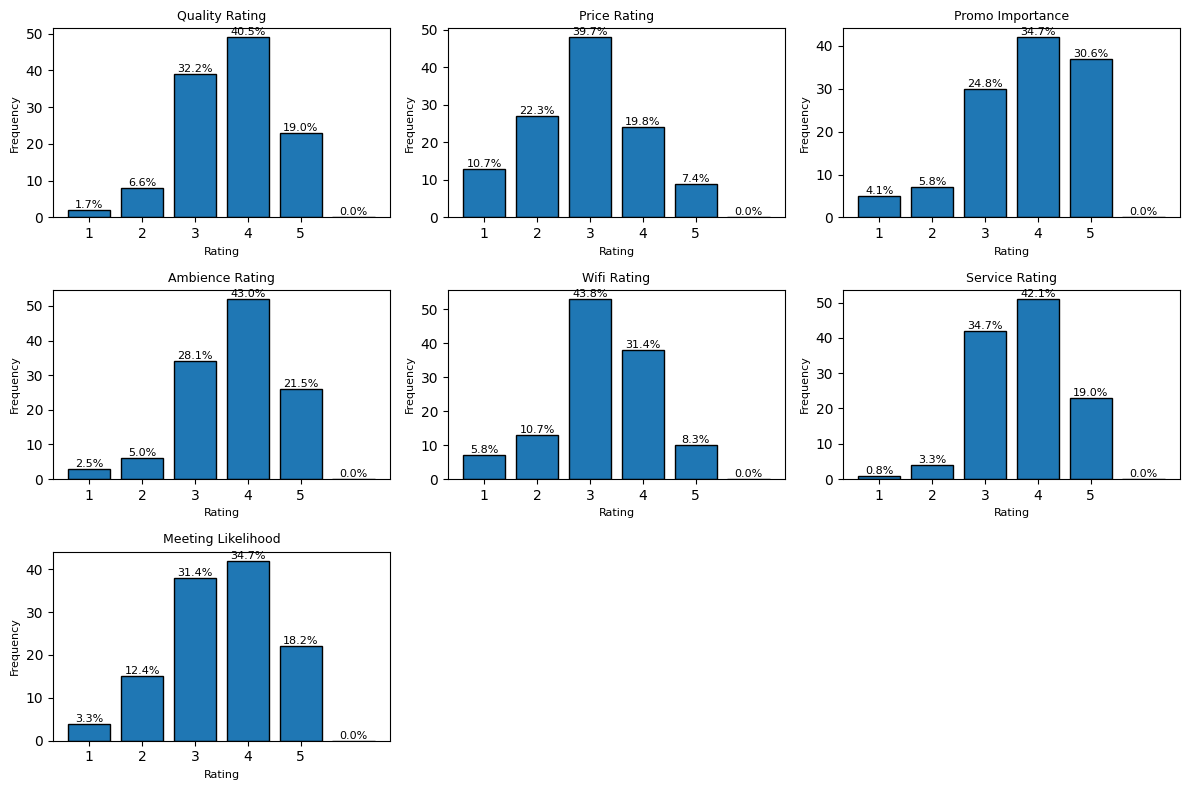

In [ ]:
#make histogram for rating columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(rating_cols):
    plt.subplot(3, 3, i+1)
    n, bins, patches = plt.hist(df[col], bins=np.arange(1, 8)-0.5, edgecolor='black', rwidth=0.8)
    total = n.sum()

    for count, patch in zip(n, patches):
        percentage = count / total * 100
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        plt.text(x, y, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)

    plt.title(col, fontsize=9)
    plt.xlabel("Rating", fontsize=8)
    plt.ylabel("Frequency", fontsize=8)
    plt.xticks(range(1, 6))

plt.tight_layout()
plt.show()

### Insight for this histogram plot
1. Quality Ranking
  - Most respondents gave a rating of 3-4, with an average 3,6.
  - This means that the quality of Starbucks product is rated good.
2. Price Rating
  - The majority of respondents gave a rating of 2-3, with an average 2,9.
  - Pricing of the products can be improved to get more customers.
3. Promo importance
  - The majority of ratings are at 4-5, with an average 3,8.
  - Indicates the importance of promotions in influencing purchase decisions.
4. Ambience Rating
  - Many respondents gave rating of 3-4, with an average 3,7.
  - Indicates that the customers are satisfied with the ambience at Starbucks.
5. Wifi Rating
  - Average is 3,2 with a lot of distribution in rating 3.
  - Wifi is rated as good but not as good as ambience or service.
6. Service Rating
  - Average around 3,7 similiar to ambience.
  - Indicates that service is generally good.
7. Meeting Likelihood
  - Average is around 3,5 with majority distribution at 3-4.
  - This means that Starbucks can be considered for meetings or hanging out.


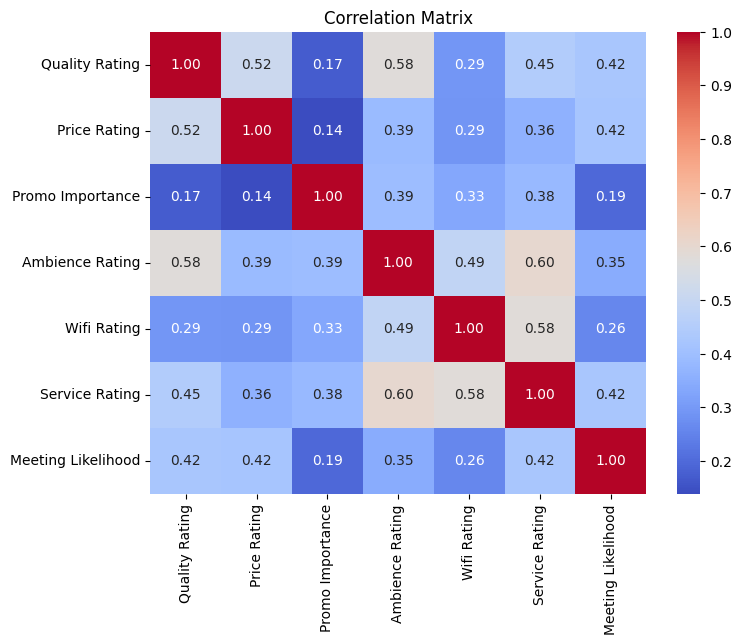

In [ ]:
#make correlation matrix
corr_matrix = df[rating_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

###Recommendations to increase sales:

1. Sales and promotions targeted on most frequently purchased items such as coffee and cold drinks, customers in the age range of 20 to 29, employed people and students.
2. Increase promotions to attract more frequent customers (e.g. discounts, membership benefits).
3. Have more competitive product pricing as more than half of the returning customers earn an annual income of less than RM25,000.
4. Collaborate with relevant influencers to attract interest and increase brand engagement.
5. Further improve on the service to increase customers' satisfaction on the services provided.

##Finalize Data for Reporting


In [ ]:
df.head()

# Save the DataFrame 'df' to a excel file.
df.to_excel("starbucks customer survey final.xlsx", index=False)